In [1]:
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import re #regex module


import spacy
from spacy import displacy


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

import yellowbrick
from yellowbrick.text import FreqDistVisualizer

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

import nltk.data
from nltk.tokenize import *

from nltk.corpus.reader.util import *
from nltk.corpus.reader.api import *
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

from gensim import matutils, corpora
from gensim.models import Word2Vec
from gensim.corpora import MmCorpus, dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel


import os
import csv
import string
#import docx2txt
#import docx
import codecs
import subprocess
from collections import Counter

nlp = spacy.load('en_core_web_sm')

import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.10f}'.format
plt.rcParams.update({'font.size': 32})
%matplotlib inline

C:\Program Files\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

In [2]:
#corpus_root = '/Users/reesj/Desktop/bdarchives-nlp-master/jpr_play/text-out/'
corpus_root = '/Users/reesj/Desktop/varmus-nlp-tests/jpr_play/text-out-2/'

In [3]:
from collections import defaultdict
from pathlib import Path

In [4]:
# create a corpus by walking through a directory of files, open each file and read filename and text into a 2 column dataframe
corpus = defaultdict(list)
for file in Path(corpus_root).iterdir():
    with open(file, "r") as file_open:
        corpus["file_name"].append(file.name)
        corpus["text"].append(file_open.read())
df = pd.DataFrame(corpus)


print(df)
#print(corpus['file_name'])

                               file_name  \
0         00-email request to HV.doc.txt   
1    1% Transfer - NIDCR - Candida f.txt   
2                              1.txt.txt   
3                       10-13e~1.doc.txt   
4           101GUID1update-fnl-1.doc.txt   
..                                   ...   
605      Proposal for an Institute v.txt   
606  proposal for Wnt-1, Brca1 cross.txt   
607                     proposal.doc.txt   
608                  PROPOSALNIH.doc.txt   
609   Proposed expts; 1999 meeting.txt   

                                                  text  
0                                                       
1    Functional Genomics: Candida AlbicansFY 00 Cos...  
2                                                       
3    E-MAILE-mail:  hv2b@nih.gov\nDear Harold:\nIt ...  
4    Guidelines for Examination of Applications for...  
..                                                 ...  
605  Proposal for an Institute for Directed Molecul...  
606  Hyposthesi

In [5]:
#trim empty text rows 
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df.dropna(subset = ["text"], inplace=True)

print(df)

                               file_name  \
1    1% Transfer - NIDCR - Candida f.txt   
3                       10-13e~1.doc.txt   
4           101GUID1update-fnl-1.doc.txt   
5                10pubmed.action.doc.txt   
6                       11-23-98.doc.txt   
..                                   ...   
604          Promising Projects1.rtf.txt   
605      Proposal for an Institute v.txt   
606  proposal for Wnt-1, Brca1 cross.txt   
607                     proposal.doc.txt   
608                  PROPOSALNIH.doc.txt   

                                                  text  
1    Functional Genomics: Candida AlbicansFY 00 Cos...  
3    E-MAILE-mail:  hv2b@nih.gov\nDear Harold:\nIt ...  
4    Guidelines for Examination of Applications for...  
5    At its meeting on Wednesday, October 13, 1999,...  
6    Proposed initial implementation plan for full-...  
..                                                 ...  
604  Promising ProjectsMarch 25, 1999\nPromising Pr...  
605  Proposal f

In [6]:
#Fetch wordcount for each text
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
1,Functional Genomics: Candida AlbicansFY 00 Cos...,1183
3,E-MAILE-mail: hv2b@nih.gov\nDear Harold:\nIt ...,409
4,Guidelines for Examination of Applications for...,2185
5,"At its meeting on Wednesday, October 13, 1999,...",260
6,Proposed initial implementation plan for full-...,1531


In [7]:
##Descriptive statistics of word counts
df.word_count.describe()

count      513.0000000000
mean     1,426.4522417154
std      2,969.3150044849
min          1.0000000000
25%        267.0000000000
50%        643.0000000000
75%      1,583.0000000000
max     55,894.0000000000
Name: word_count, dtype: float64

In [8]:
df = df.replace('\n',' ', regex=True)

print (df)
                                                

                               file_name  \
1    1% Transfer - NIDCR - Candida f.txt   
3                       10-13e~1.doc.txt   
4           101GUID1update-fnl-1.doc.txt   
5                10pubmed.action.doc.txt   
6                       11-23-98.doc.txt   
..                                   ...   
604          Promising Projects1.rtf.txt   
605      Proposal for an Institute v.txt   
606  proposal for Wnt-1, Brca1 cross.txt   
607                     proposal.doc.txt   
608                  PROPOSALNIH.doc.txt   

                                                  text  word_count  
1    Functional Genomics: Candida AlbicansFY 00 Cos...        1183  
3    E-MAILE-mail:  hv2b@nih.gov Dear Harold: It wa...         409  
4    Guidelines for Examination of Applications for...        2185  
5    At its meeting on Wednesday, October 13, 1999,...         260  
6    Proposed initial implementation plan for full-...        1531  
..                                                 ...   

In [22]:
stop_words = set(stopwords.words('english'))

#add words that aren't in the small NLTK stopwords list
#it's big but don't need to worry about it for just a wordcloud
#new_stopwords = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

#mysql's stopwords list
new_stopwords = ["a's" , "able" , "about" , "above" , "according" , "accordingly" , "across" , "actually" , "after" , "afterwards" , "again" , "against" , "ain't" , "all" , "allow" , "allows" , "almost" , "alone" , "along" , "already" , "also" , "although" , "always" , "am" , "among" , "amongst" , "an" , "and" , "another" , "any" , "anybody" , "anyhow" , "anyone" , "anything" , "anyway" , "anyways" , "anywhere" , "apart" , "appear" , "appreciate" , "appropriate" , "are" , "aren't" , "around" , "as" , "aside" , "ask" , "asking" , "associated" , "at" , "available" , "away" , "awfully" , "be" , "became" , "because" , "become" , "becomes" , "becoming" , "been" , "before" , "beforehand" , "behind" , "being" , "believe" , "below" , "beside" , "besides" , "best" , "better" , "between" , "beyond" , "both" , "brief" , "but" , "by" , "c'mon" , "c's" , "came" , "can" , "can't" , "cannot" , "cant" , "cause" , "causes" , "certain" , "certainly" , "changes" , "clearly" , "co" , "com" , "come" , "comes" , "concerning" , "consequently" , "consider" , "considering" , "contain" , "containing" , "contains" , "corresponding" , "could" , "couldn't" , "course" , "currently" , "definitely" , "described" , "despite" , "did" , "didn't" , "different" , "do" , "does" , "doesn't" , "doing" , "don't" , "done" , "down" , "downwards" , "during" , "each" , "edu" , "eg" , "eight" , "either" , "else" , "elsewhere" , "enough" , "entirely" , "especially" , "et" , "etc" , "even" , "ever" , "every" , "everybody" , "everyone" , "everything" , "everywhere" , "ex" , "exactly" , "example" , "except" , "far" , "few" , "fifth" , "first" , "five" , "followed" , "following" , "follows" , "for" , "former" , "formerly" , "forth" , "four" , "from" , "further" , "furthermore" , "get" , "gets" , "getting" , "given" , "gives" , "go" , "goes" , "going" , "gone" , "got" , "gotten" , "greetings" , "had" , "hadn't" , "happens" , "hardly" , "has" , "hasn't" , "have" , "haven't" , "having" , "he" , "he's" , "hello" , "help" , "hence" , "her" , "here" , "here's" , "hereafter" , "hereby" , "herein" , "hereupon" , "hers" , "herself" , "hi" , "him" , "himself" , "his" , "hither" , "hopefully" , "how" , "howbeit" , "however" , "i'd" , "i'll" , "i'm" , "i've" , "ie" , "if" , "ignored" , "immediate" , "in" , "inasmuch" , "inc" , "indeed" , "indicate" , "indicated" , "indicates" , "inner" , "insofar" , "instead" , "into" , "inward" , "is" , "isn't" , "it" , "it'd" , "it'll" , "it's" , "its" , "itself" , "just" , "keep" , "keeps" , "kept" , "know" , "known" , "knows" , "last" , "lately" , "later" , "latter" , "latterly" , "least" , "less" , "lest" , "let" , "let's" , "like" , "liked" , "likely" , "little" , "look" , "looking" , "looks" , "ltd" , "mainly" , "many" , "may" , "maybe" , "me" , "mean" , "meanwhile" , "merely" , "might" , "more" , "moreover" , "most" , "mostly" , "much" , "must" , "my" , "myself" , "name" , "namely" , "nd" , "near" , "nearly" , "necessary" , "need" , "needs" , "neither" , "never" , "nevertheless" , "new" , "next" , "nine" , "no" , "nobody" , "non" , "none" , "noone" , "nor" , "normally" , "not" , "nothing" , "novel" , "now" , "nowhere" , "obviously" , "of" , "off" , "often" , "oh" , "ok" , "okay" , "old" , "on" , "once" , "one" , "ones" , "only" , "onto" , "or" , "other" , "others" , "otherwise" , "ought" , "our" , "ours" , "ourselves" , "out" , "outside" , "over" , "overall" , "own" , "particular" , "particularly" , "per" , "perhaps" , "placed" , "please" , "plus" , "possible" , "presumably" , "probably" , "provides" , "que" , "quite" , "qv" , "rather" , "rd" , "re" , "really" , "reasonably" , "regarding" , "regardless" , "regards" , "relatively" , "respectively" , "right" , "said" , "same" , "saw" , "say" , "saying" , "says" , "second" , "secondly" , "see" , "seeing" , "seem" , "seemed" , "seeming" , "seems" , "seen" , "self" , "selves" , "sensible" , "sent" , "serious" , "seriously" , "seven" , "several" , "shall" , "she" , "should" , "shouldn't" , "since" , "six" , "so" , "some" , "somebody" , "somehow" , "someone" , "something" , "sometime" , "sometimes" , "somewhat" , "somewhere" , "soon" , "sorry" , "specified" , "specify" , "specifying" , "still" , "sub" , "such" , "sup" , "sure" , "t's" , "take" , "taken" , "tell" , "tends" , "th" , "than" , "thank" , "thanks" , "thanx" , "that" , "that's" , "thats" , "the" , "their" , "theirs" , "them" , "themselves" , "then" , "thence" , "there" , "there's" , "thereafter" , "thereby" , "therefore" , "therein" , "theres" , "thereupon" , "these" , "they" , "they'd" , "they'll" , "they're" , "they've" , "think" , "third" , "this" , "thorough" , "thoroughly" , "those" , "though" , "three" , "through" , "throughout" , "thru" , "thus" , "to" , "together" , "too" , "took" , "toward" , "towards" , "tried" , "tries" , "truly" , "try" , "trying" , "twice" , "two" , "un" , "under" , "unfortunately" , "unless" , "unlikely" , "until" , "unto" , "up" , "upon" , "us" , "use" , "used" , "useful" , "uses" , "using" , "usually" , "value" , "various" , "very" , "via" , "viz" , "vs" , "want" , "wants" , "was" , "wasn't" , "way" , "we" , "we'd" , "we'll" , "we're" , "we've" , "welcome" , "well" , "went" , "were" , "weren't" , "what" , "what's" , "whatever" , "when" , "whence" , "whenever" , "where" , "where's" , "whereafter" , "whereas" , "whereby" , "wherein" , "whereupon" , "wherever" , "whether" , "which" , "while" , "whither" , "who" , "who's" , "whoever" , "whole" , "whom" , "whose" , "why" , "will" , "willing" , "wish" , "with" , "within" , "without" , "won't" , "wonder" , "would" , "wouldn't" , "yes" , "yet" , "you" , "you'd" , "you'll" , "you're" , "you've" , "your" , "yours" , "yourself" , "yourselves" , "zero"]
new_stopwords_list = stop_words.union(new_stopwords)

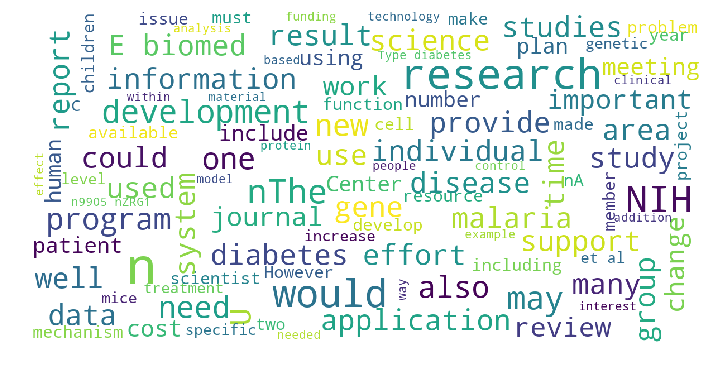

In [23]:
def show_wordcloud(text):
    """Take a set of text, apply Wordcloud and plot the results as a wordcloud visualization """
    stop_words = set(stopwords.words('english'))
    #stop_words = new_stopwords_list
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(text))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    #plt.show()
    plt.savefig("/Users/reesj/Desktop/varmus-nlp-tests/wordcloud-lda-nltk-stopwords.png", format="png")

show_wordcloud(corpus['text'])

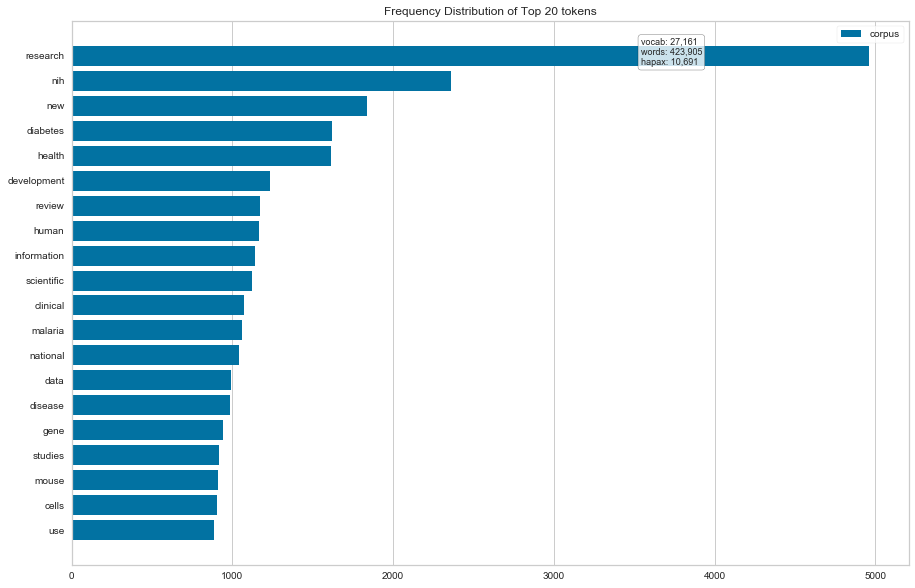

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

vectorizer = CountVectorizer(stop_words='english')
#vectorizer = CountVectorizer(stop_words=new_stopwords_list)
docs       = vectorizer.fit_transform(corpus['text'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(n=20, features=features, size=(1080, 720)) #default N is 50, can change counts here
visualizer.fit(docs)

    
visualizer.show();

In [12]:
# clean up texts some more Workspace
varmus_files=pd.DataFrame(df, columns=['text'])

#remove special characters
varmus_files['clean_documents'] = df['text'].str.replace("[^a-zA-Z#]", " ")

#remove words have letters less than 3
varmus_files['clean_documents'] = varmus_files['clean_documents'].fillna('').apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

#lowercase all characters
varmus_files['clean_documents'] = varmus_files['clean_documents'].fillna('').apply(lambda x: x.lower())

# Remove punctuation
varmus_files['clean_documents'] = varmus_files['clean_documents'].map(lambda x: re.sub(r'[^\w\s]', '', x))


In [13]:
varmus_files.head()

,text,clean_documents
1,Functional Genomics: Candida AlbicansFY 00 Cos...,functional genomics candida albicansfy cost mi...
3,E-MAILE-mail: hv2b@nih.gov Dear Harold: It wa...,maile mail nih gov dear harold was delightful ...
4,Guidelines for Examination of Applications for...,guidelines for examination applications for ag...
5,"At its meeting on Wednesday, October 13, 1999,...",its meeting wednesday october the council appr...
6,Proposed initial implementation plan for full-...,proposed initial implementation plan for full ...


In [14]:
#Build the TF-IDF DTM
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)

# SVD to reduce dimensionality; n_components defines the number of topics; change this to learn more: 
# could combine gridsearch to tell us how many to define n_components
svd_model = TruncatedSVD(n_components=3,         
                         algorithm='randomized',
                         n_iter=20)

# Using a pipeline for fun to combine tf-idf + SVD fitting against corpus
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(varmus_files['clean_documents'])

In [15]:
# Let's capture the output of our topic model
topic_encoded_df = pd.DataFrame(svd_matrix, columns = ["topic_1", "topic_2", "topic_3"])
topic_encoded_df["documents"] = varmus_files['clean_documents']

In [16]:
# Using the below - what are some topics?
topic_encoded_df.sort_values(by=['topic_1'], ascending=False)[:5]

,topic_1,topic_2,topic_3,documents
129,0.5605646808,0.7553574033,-0.0419175988,email templatetuesday september members presen...
130,0.5602751721,0.7547651416,-0.0418485132,email template members present john gallin liu...
36,0.5555902358,0.6441568186,-0.0051434549,draft purpose this acd will consider the prese...
186,0.5474052754,0.7729844064,-0.0400978822,technicalfault tolerance with dhcp servers loo...
187,0.5435917963,0.7643184819,-0.0379304641,diane waxmeeting with rep porter and rep mille...


In [17]:
# Using the below - what are some topics?
topic_encoded_df.sort_values(by=['topic_2'], ascending=False)[:5]

,topic_1,topic_2,topic_3,documents
201,0.5388589896,0.7829081787,-0.0432719969,and distinguished members the diabetes researc...
200,0.5388589896,0.7829081787,-0.0432719969,overallnational economic council domestic poli...
186,0.5474052754,0.7729844064,-0.0400978822,technicalfault tolerance with dhcp servers loo...
182,0.5310596024,0.7688465075,-0.0392266307,NaN
183,0.5333121858,0.7663089553,-0.0380909258,scientific philosophyscientific philosophy the...


In [18]:
# Using the below - what are some topics?
topic_encoded_df.sort_values(by=['topic_3'], ascending=False)[:5]

,topic_1,topic_2,topic_3,documents
15,0.3394641671,-0.1350679290,0.4721034556,national institutes healthminority aging resea...
17,0.3399699970,-0.1354507773,0.4716922338,association american publisherspatricia schroe...
16,0.3397105223,-0.1351474812,0.4708145665,this draft shows drof the hoc national gene ve...
20,0.3139791964,-0.1248569335,0.4502843932,draft office science and technology policy fac...
19,0.3134158713,-0.1242148233,0.4492938301,draft office science and technology policy fac...


## LDA

In [13]:
varmus_files_lda = pd.DataFrame(df, columns=['text'])

In [14]:
#trim empty text rows 
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df = df.replace('\n',' ', regex=True)

df.dropna(subset = ["text"], inplace=True)

print(df)

                               file_name  \
1    1% Transfer - NIDCR - Candida f.txt   
3                       10-13e~1.doc.txt   
4           101GUID1update-fnl-1.doc.txt   
5                10pubmed.action.doc.txt   
6                       11-23-98.doc.txt   
..                                   ...   
604          Promising Projects1.rtf.txt   
605      Proposal for an Institute v.txt   
606  proposal for Wnt-1, Brca1 cross.txt   
607                     proposal.doc.txt   
608                  PROPOSALNIH.doc.txt   

                                                  text  
1    Functional Genomics: Candida AlbicansFY 00 Cos...  
3    E-MAILE-mail:  hv2b@nih.gov Dear Harold: It wa...  
4    Guidelines for Examination of Applications for...  
5    At its meeting on Wednesday, October 13, 1999,...  
6    Proposed initial implementation plan for full-...  
..                                                 ...  
604  Promising ProjectsMarch 25, 1999 Promising Pro...  
605  Proposal f

In [15]:
varmus_files_lda.head()

,text
1,Functional Genomics: Candida AlbicansFY 00 Cos...
3,E-MAILE-mail: hv2b@nih.gov Dear Harold: It wa...
4,Guidelines for Examination of Applications for...
5,"At its meeting on Wednesday, October 13, 1999,..."
6,Proposed initial implementation plan for full-...


In [16]:
# Remove punctuation
varmus_files_lda['processed'] = varmus_files_lda['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert the titles to lowercase
varmus_files_lda['processed'] = varmus_files_lda['processed'].map(lambda x: x.lower())

# Print out the first rows of papers
varmus_files_lda['processed'][0:10]

1     functional genomics candida albicansfy 00 cost...
3     emailemail  hv2bnihgov dear harold it was a de...
4     guidelines for examination of applications for...
5     at its meeting on wednesday october 13 1999 th...
6     proposed initial implementation plan for fulll...
7     900 am 500 pm  job fair for nih postdoctoral f...
8      office of intramural research individuals fro...
9     date of meeting  the subcommittees have repres...
10    office of animal care and usetraining schedule...
11    report on the 2nd meeting of the mimtdr task f...
Name: processed, dtype: object

In [67]:
#Lemmatize the data to reduce the feature space

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
varmus_files_lda['processed_lemma'] = varmus_files_lda['processed'].map(lambda x: [token.lemma_ for token in nlp(x) if token.lemma_ 
!= '-PRON-' and token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV'}])

# Final cleaning, dropping 2 letter words
varmus_files_lda['new_processed_lemma'] = varmus_files_lda['processed_lemma'].map(lambda x: [t for t in x if len(t) > 2])


In [20]:
varmus_files_lda['new_processed_lemma'].head(10)

1     [functional, genomic, cost, total, project, co...
3     [emailemail, dear, harold, delightful, treat, ...
4     [guideline, examination, application, agency, ...
5     [meeting, council, approve, participation, pro...
6     [propose, initial, implementation, plan, initi...
7     [job, fair, fellow, conference, center, audito...
8     [office, intramural, research, individual, dis...
9     [date, meet, subcommittee, have, representativ...
10    [animal, care, usetraining, schedule, advance,...
11    [report, 2nd, meeting, force, malaria, researc...
Name: new_processed_lemma, dtype: object

In [21]:
print(varmus_files_lda['new_processed_lemma'])

1      [functional, genomic, cost, total, project, co...
3      [emailemail, dear, harold, delightful, treat, ...
4      [guideline, examination, application, agency, ...
5      [meeting, council, approve, participation, pro...
6      [propose, initial, implementation, plan, initi...
                             ...                        
604    [promise, projectsmarch, promise, project, men...
605    [proposal, institute, direct, molecular, evolu...
606    [hyposthesisinvestigate, role, brca1, loss, in...
607    [pten, target, deletionpten, target, deletion,...
608    [1998workshop, behavior, laboratory, mouse, su...
Name: new_processed_lemma, Length: 513, dtype: object


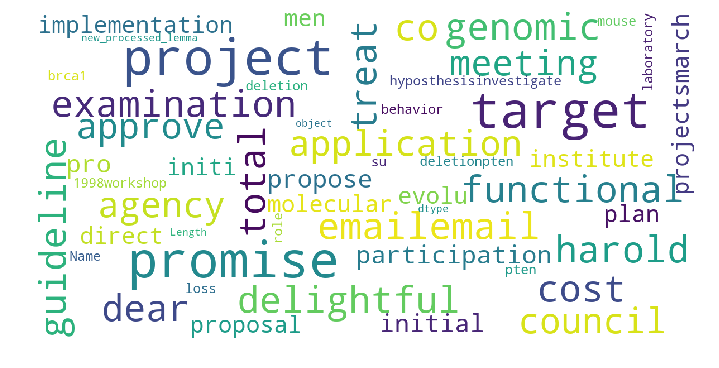

In [24]:
show_wordcloud(varmus_files_lda['new_processed_lemma'])

In [25]:
# Create a corpus from a list of the texts with a large sample n
texts = varmus_files_lda.sample(n=200, random_state=36)['new_processed_lemma'].values
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [26]:
# View vectors
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 3), (12, 5), (13, 2), (14, 3), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 5), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 3), (39, 3), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)]]


In [27]:
n_topics=9

my_lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=24, minimum_probability=0, passes=10)

In [28]:
# We can limit what is returned by specifying the number of topics we're interested in and the number of works to return
num_topics = 9
num_words = 5
for ti, topic in enumerate(my_lda.show_topics(num_topics = num_topics, num_words= num_words)):
    print("Topic: %d" % (ti))
    print (topic)
    print()

Topic: 0
(0, '0.026*"cell" + 0.022*"mouse" + 0.019*"gene" + 0.017*"mammary" + 0.015*"tumor"')

Topic: 1
(1, '0.034*"research" + 0.023*"policy" + 0.018*"agency" + 0.015*"misconduct" + 0.011*"federal"')

Topic: 2
(2, '0.013*"have" + 0.010*"journal" + 0.010*"report" + 0.005*"other" + 0.005*"use"')

Topic: 3
(3, '0.011*"endostatin" + 0.010*"study" + 0.009*"model" + 0.009*"activity" + 0.009*"use"')

Topic: 4
(4, '0.012*"have" + 0.011*"research" + 0.008*"sequence" + 0.006*"use" + 0.006*"genome"')

Topic: 5
(5, '0.027*"diabetes" + 0.023*"research" + 0.015*"have" + 0.010*"type" + 0.010*"disease"')

Topic: 6
(6, '0.006*"have" + 0.005*"new" + 0.004*"gene" + 0.004*"splicing" + 0.004*"identify"')

Topic: 7
(7, '0.015*"research" + 0.010*"have" + 0.008*"program" + 0.007*"gene" + 0.006*"study"')

Topic: 8
(8, '0.013*"mouse" + 0.012*"have" + 0.008*"strain" + 0.006*"year" + 0.006*"sequence"')



In [33]:
# How similar are topics? Remember cosine similarity from above. It's built-in to gensim letting us see how similar topics are to each other
# how similar are topic 0 and
matutils.cossim(my_lda.get_topic_terms(0), my_lda.get_topic_terms(8))

0.5010410886086212

In [34]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=my_lda, texts=varmus_files_lda['new_processed_lemma'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43041360147664354


## Check the coherence score - high or low? Generate a coherence model to find the sweet spot for number of topics

In [68]:
#Generate a coherence model to find the sweet spot for number of topics. Computation will take a while
max_topics = 30
coh_list = []
for n_topics in range(3,max_topics+1):
    # Train the model on the corpus
    my_lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42, alpha=0.1, eta=0.9, passes=10)
    # Estimate coherence
    cm = CoherenceModel(model=my_lda, texts=texts, dictionary=dictionary, coherence='c_v', topn=20)
    coherence = cm.get_coherence_per_topic() # get coherence value
    coh_list.append(coherence)

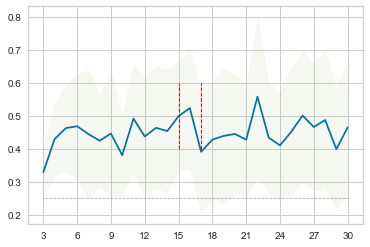

In [71]:
# Coherence scores:
coh_means = np.array([np.mean(l) for l in coh_list])
coh_stds = np.array([np.std(l) for l in coh_list])

#import matplotlib.pyplot as plt
#%matplotlib inline
plt.xticks(np.arange(3, max_topics+1, 3.0));
plt.plot(range(3,max_topics+1), coh_means);
plt.fill_between(range(3,max_topics+1), coh_means-coh_stds, coh_means+coh_stds, color='g', alpha=0.1);
plt.vlines([15, 17], 0.4, 0.6, color='red', linestyles='dashed',  linewidth=1);
plt.hlines([0.253], 3, max_topics, color='black', linestyles='dotted',  linewidth=0.5);
plt.savefig("/Users/reesj/Desktop/varmus-nlp-tests/coherence-plot.png", format="png")

In [59]:
n_topics=16

my_lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42, minimum_probability=0, passes=10)

In [60]:
num_topics = 16
num_words = 8
for ti, topic in enumerate(my_lda.show_topics(num_topics = num_topics, num_words= num_words)):
    print("Topic: %d" % (ti))
    print (topic)
    print()

Topic: 0
(0, '0.017*"sequence" + 0.011*"mouse" + 0.010*"year" + 0.010*"genome" + 0.010*"resource" + 0.008*"have" + 0.008*"strain" + 0.008*"need"')

Topic: 1
(1, '0.011*"have" + 0.008*"activity" + 0.008*"endostatin" + 0.007*"server" + 0.007*"protein" + 0.006*"use" + 0.006*"band" + 0.005*"ptdin"')

Topic: 2
(2, '0.015*"cell" + 0.013*"gene" + 0.011*"have" + 0.010*"protein" + 0.008*"bcatenin" + 0.006*"expression" + 0.006*"signal" + 0.006*"plakoglobin"')

Topic: 3
(3, '0.016*"gene" + 0.013*"vector" + 0.011*"have" + 0.011*"ngvl" + 0.009*"lung" + 0.009*"tumor" + 0.008*"mouse" + 0.007*"facility"')

Topic: 4
(4, '0.027*"drug" + 0.014*"beneficiary" + 0.014*"coverage" + 0.012*"health" + 0.010*"disorder" + 0.008*"percent" + 0.008*"neurological" + 0.008*"plan"')

Topic: 5
(5, '0.020*"research" + 0.012*"have" + 0.011*"science" + 0.006*"health" + 0.006*"area" + 0.005*"social" + 0.005*"work" + 0.005*"child"')

Topic: 6
(6, '0.008*"animal" + 0.007*"have" + 0.005*"cancer" + 0.005*"microorganism" + 0.005

In [62]:
# How similar are topics? Remember cosine similarity from above. It's built-in to gensim letting us see how similar topics are to each other
# how similar are topic 0 and 1 62%
matutils.cossim(my_lda.get_topic_terms(0), my_lda.get_topic_terms(10))

0.1515795571251958

In [63]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=my_lda, texts=varmus_files_lda['new_processed_lemma'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42273526333425687


## LDA Topic Model with 13 topics

In [55]:
# Reloading our model with 16 topics
n_topics=16
#n_topics=6
n_top_words = 30
my_lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42, minimum_probability=0)

In [56]:
import pyLDAvis.sklearn
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(my_lda, corpus, dictionary)

PreparedData(topic_coordinates=                  x             y  topics  cluster          Freq
topic                                                           
9     -0.0047869542 -0.0065655178       1        1 23.8067264546
11     0.0052161659  0.0097833651       2        1  9.2054626238
14    -0.0163484167  0.0213637391       3        1  9.1120571939
0      0.0005845766  0.0132041017       4        1  7.5288886556
5     -0.0347796996 -0.0032090001       5        1  7.5240542238
2      0.0249012909  0.0064760629       6        1  6.9644156680
15    -0.0033930222 -0.0037902569       7        1  6.9065180242
7     -0.0044252052 -0.0009713443       8        1  6.1536464762
3      0.0182087787  0.0093555217       9        1  5.3454181401
4      0.0210269834 -0.0089017103      10        1  4.9957456120
10    -0.0164165144 -0.0023200302      11        1  3.3242154406
8     -0.0081874032 -0.0085146986      12        1  3.1774706961
12     0.0022648162  0.0037144737      13        1  2.4218202345
1      0.0052017745 -0.0109023441      14        1  1.6756432410
13     0.0012054062 -0.0127314330      15        1  1.2002738656
6      0.0097274231 -0.0059909292      16        1  0.6576434499, topic_info=          Term             Freq            Total Category       logprob  \
177       have 1,815.0000000000 1,815.0000000000  Default 30.0000000000   
1330  diabetes 1,413.0000000000 1,413.0000000000  Default 29.0000000000   
288   research 2,055.0000000000 2,055.0000000000  Default 28.0000000000   
22        gene   639.0000000000   639.0000000000  Default 27.0000000000   
711        use   703.0000000000   703.0000000000  Default 26.0000000000   
...        ...              ...              ...      ...           ...   
172      group     2.4462002256   380.7070266130  Topic16 -5.9394000000   
24     genetic     2.6133040140   448.8273395287  Topic16 -5.8734000000   
351       year     2.5135472916   428.3206034962  Topic16 -5.9123000000   
241        new     2.7447545419   628.6733082070  Topic16 -5.8243000000   
278    provide     2.3845490392   468.6029982613  Topic16 -5.9650000000   

           loglift  
177  30.0000000000  
1330 29.0000000000  
288  28.0000000000  
22   27.0000000000  
711  26.0000000000  
...            ...  
172  -0.0232000000  
24   -0.1218000000  
351  -0.1139000000  
241  -0.4097000000  
278  -0.2565000000  

[1260 rows x 6 columns], token_table=       Topic         Freq           Term
term                                    
1925      10 0.4390953869        04jun96
10715     11 0.6872031561        1800nih
4060       1 0.6913154151  1999committee
1074       1 0.5691956361           21st
1074       2 0.0711494545           21st
...      ...          ...            ...
351       14 0.0280163968           year
351       15 0.0163428982           year
351       16 0.0070040992           year
9835       4 0.5653190473     zidovudine
11225      1 0.6727810831        zoology

[3952 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 12, 15, 1, 6, 3, 16, 8, 4, 5, 11, 9, 13, 2, 14, 7])

In [57]:
# export to interactive stand-alone html page
p = pyLDAvis.gensim_models.prepare(my_lda, corpus, dictionary)
pyLDAvis.save_html(p, 'varmus-lda-16-topics.html')